# k-means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

## Importing Dataframe
**Source:**
<br>
__Original Owners:__
<br>Forina, M. et al, PARVUS - 
<br>An Extendible Package for Data Exploration, Classification and Correlation. 
<br>Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 
<br>16147 Genoa, Italy.
<br>
__Donor:__
<br>Stefan Aeberhard, email: <u>stefan <b>'@'</b> coral.cs.jcu.edu.au</u></p>


**Data Set Information:**
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.)  I lost it, and b.), I would not know which 13 variables are included in the set.
<br>
The __attributes__ are (dontated by Riccardo Leardi):
+ Alcohol
+ Malic acid
+ Ash
+ Alcalinity of ash  
+ Magnesium
+ Total phenols
+ Flavanoids
+ Nonflavanoid phenols
+ Proanthocyanins
+ Color intensity
+ Hue
+ OD280/OD315 of diluted wines
+ Proline 
<br>
**Attribute Information:**
+ All attributes are continuous
+ No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant)
<br>

NOTE: 1st attribute is class identifier (1-3)

**Class Distribution** (number of instances per class):

+ class 1: 59
+ class 2: 71
+ class 3: 48

In [2]:
wine_dataframe = pd.read_csv('wine.data', names=['Class','Alcohol', 'Malic acid',
                                       'Ash', 'Alcalinity of ash', 'Magnesium',
                                       'Total phenols','Flavanoids', 'Nonflavanoid phenols',
                                       'Proanthocyanins', 'Color intensity','Hue',
                                       'OD280/OD315 of diluted wines', 'Proline'])

In [3]:
wine = wine_dataframe[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                       'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                       'Color intensity','Hue', 'OD280/OD315 of diluted wines', 'Proline']]

## k-means Algorithms
Let $X = \{x_1, \ldots , x_n\}$ be a set of $n$ data points, each with dimension $d$. The k-means problem seeks to find a set of k means $M = \{\mu_1, \ldots , \mu_k\}$ which minimizes the function
$$
f(M) = \sum _{\mathbf {x} \in X} {\underset {\mathbf {\mu \in M} }{\operatorname {min} }}\; \left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}
$$

In other words, we wish to choose k means so as to minimize the sum of the squared distances between each point in the dataset and the mean closest to that point.

#### Standard k-means
The standard algorithm for solving k-means uses an iterative process which guarantees a decrease in total error (value of the objective function $f(M)$) on each step. The algorithm is as follows:
1. Choose k initial means $\mu_1, \ldots, \mu_k$ uniformly at random from the set $X$.
2. For each point $x \in X$, find the closest mean $\mu_i$ and add $x$ to a set $S_i$.
3. For $i = 1, \ldots , k$, set $\mu_i$ to be the centroid of the points in $S_i$.
4. Repeat steps 2 and 3 until the means have converged.

The convergence criterion for step 4 is typically when the total error stops changing between steps, in which case a local optimum of the objective function has been reached. However, some implementations terminate the search when the change in error between iterations drops below a certain threshold. Each iteration of this standard algorithm takes time $O(nkd)$. In principle, the number of iterations required for the algorithm to fully converge can be very large, but on real datasets the algorithm typically converges in at most a few dozen iterations.

In [4]:
def euc_dist(x, y):
    """
    Euclidean distance.
    """
    return np.sqrt(((x - y) ** 2).sum())

In [5]:
def kCluster(M, k):
    """
    :param M: pandas dataframe with data for clustering
    :type M: pandas.DataFrame
    :param k: number of clusters
    :type k: int
    :return: pandas dataframe M + columns "Cluster" with number of cluster
    """
    m = M.shape[0]
    random.seed(1234)
    rdm = random.sample(range(m), k)
    centroids = {c: M.iloc[rdm[c]] for c in range(k)}
    clusters = {c: [] for c in centroids}
    
    def clusters_update():
        """
        Function that assigns each point to a cluster (S_i)
        """
        clusters_temp = {c: [] for c in centroids}
        for i in range(m):
            dist = {euc_dist(M.iloc[i], centroids[j]): j for j in range(k)}
            clusters_temp[dist[min(dist)]].append(i)
        return clusters_temp
    
    def centroids_update():
        """
        Function that calculates the center of the cluster
        """
        centroids_temp = {c: M.iloc[clusters[c]].mean().round(decimals=2) for c in range(k)}
        return centroids_temp
   
    while True:
        clusters = clusters_update()
        centroids_temp = centroids_update()
        if all([all(centroids[c].values == centroids_temp[c].values) for c in range(k)]):
             break
        else:
            centroids = centroids_temp
            
    for i in range(k):
        M.loc[clusters[i], 'Cluster'] = i + 1
    M['Cluster'] = M['Cluster'].astype(int)
    
    return M[['Cluster','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                      'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                      'Color intensity','Hue', 'OD280/OD315 of diluted wines', 'Proline']]

In [6]:
"""
Divide the 'wine' dataset into 'k=3' clusters
"""
cluster = kCluster(wine, 3)

In [7]:
"""
Print the number of elements of each cluster
"""
print('Cluster 1: ' + str(len(cluster[cluster['Cluster'] == 1])) + '\n' +
      'Cluster 2: ' + str(len(cluster[cluster['Cluster'] == 2])) + '\n' +
      'Cluster 3: ' + str(len(cluster[cluster['Cluster'] == 3])))

Cluster 1: 100
Cluster 2: 50
Cluster 3: 28


We can see that the number of the elements of each cluster (we got by using the algorithm k-means) is different compared with the starting division into classes of the dataframe “wine_daraframe”. Of course, repeating the algorithm many times, the number of elements can be different since the starting centroids are causal.

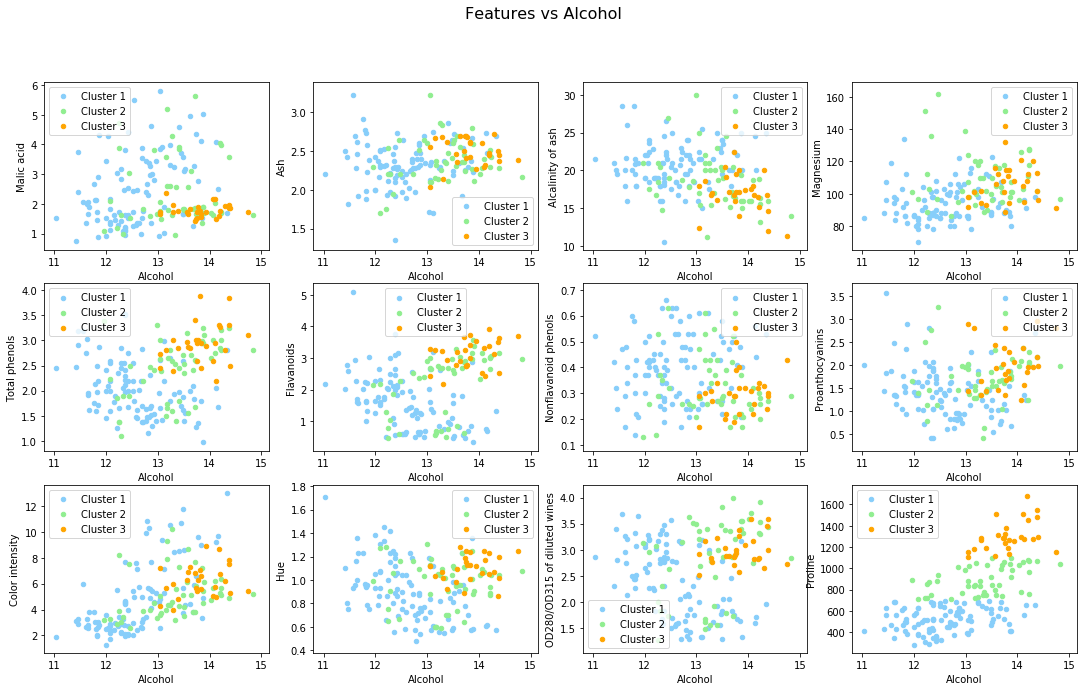

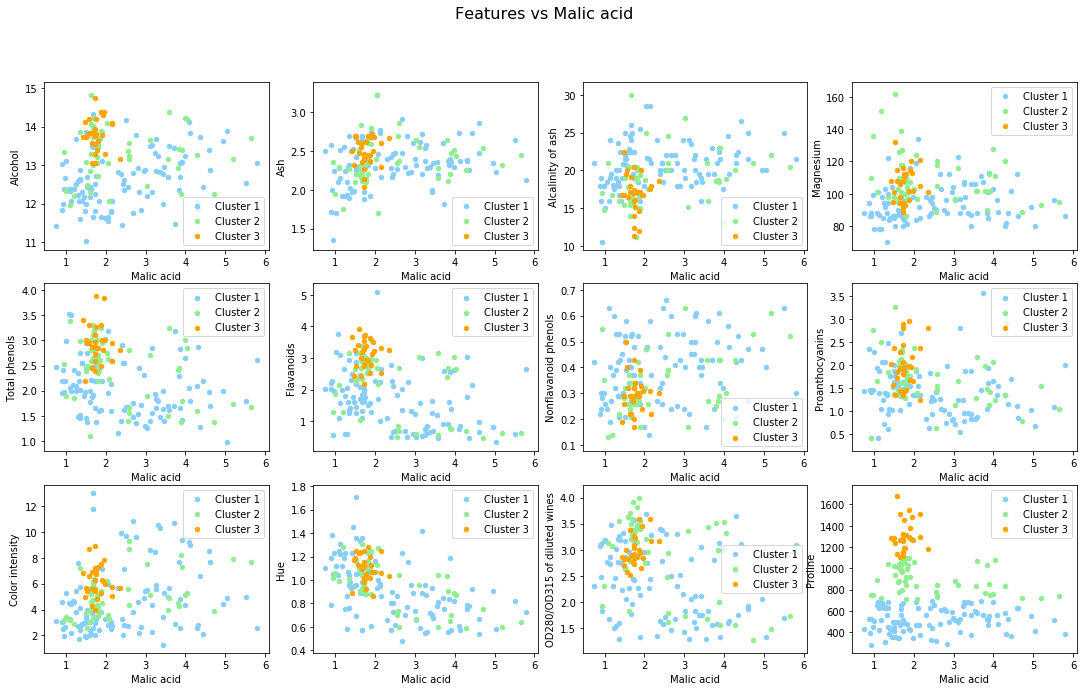

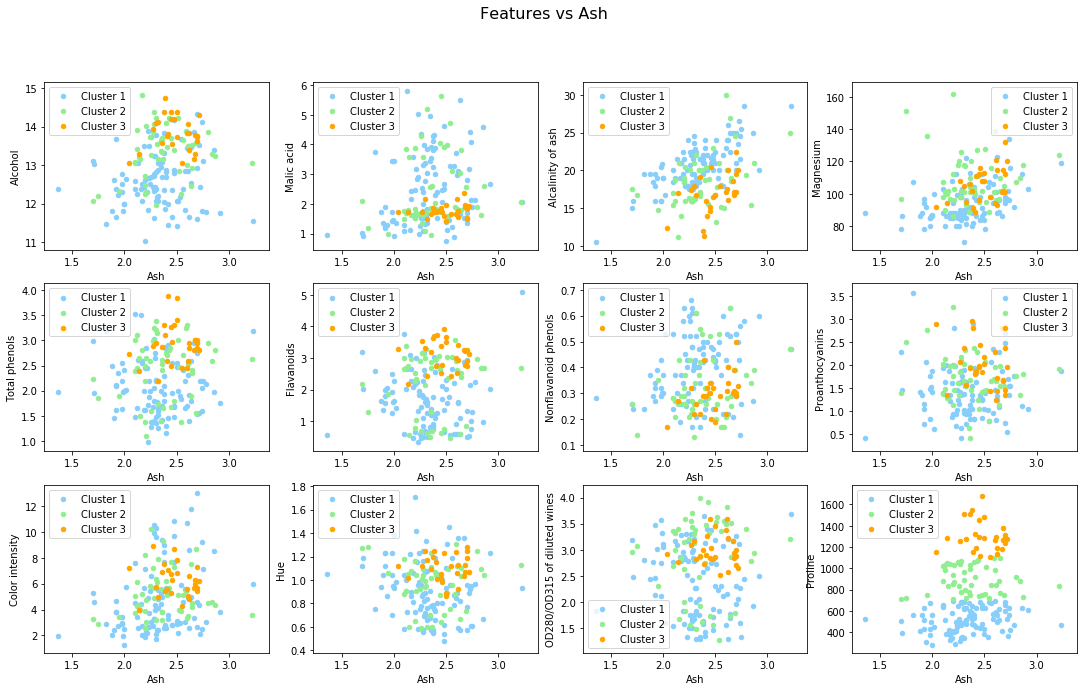

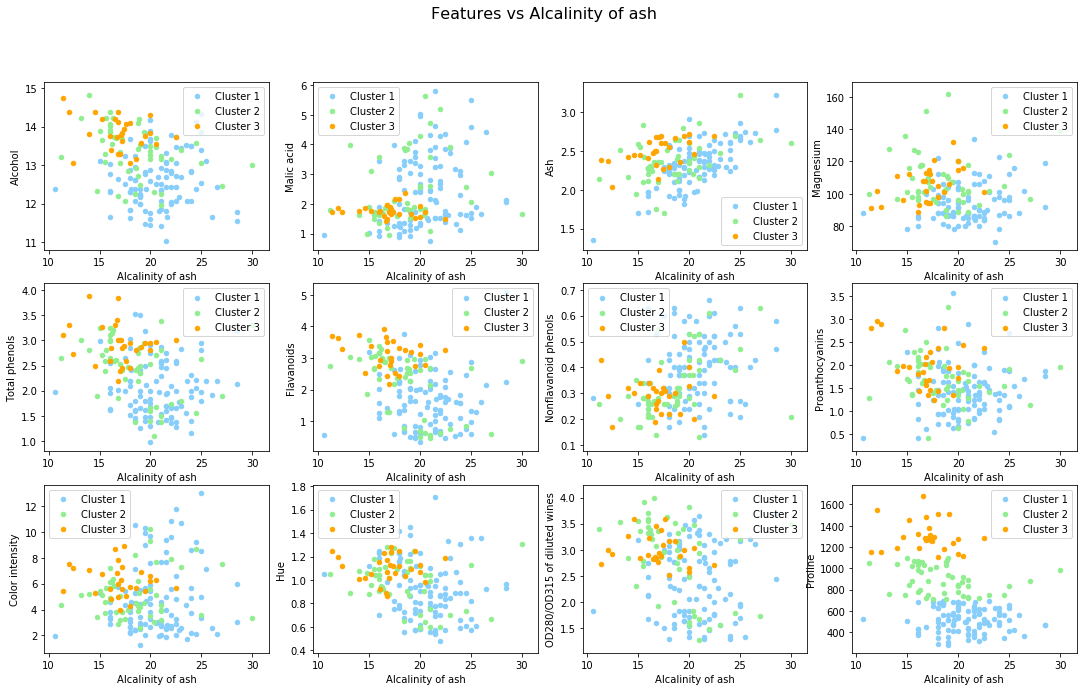

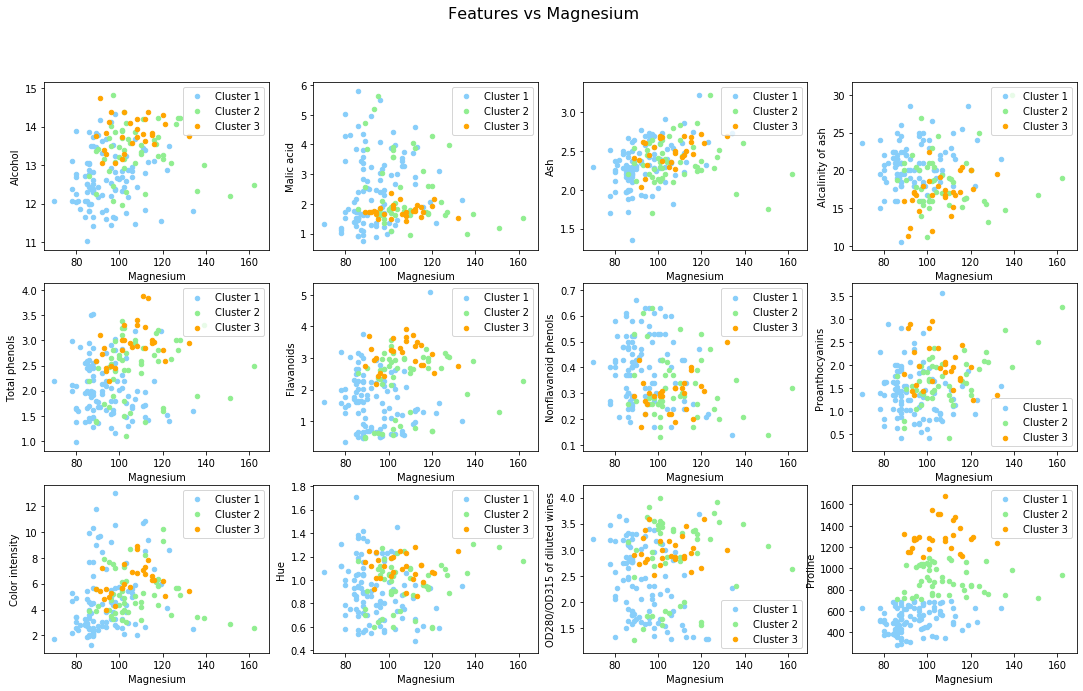

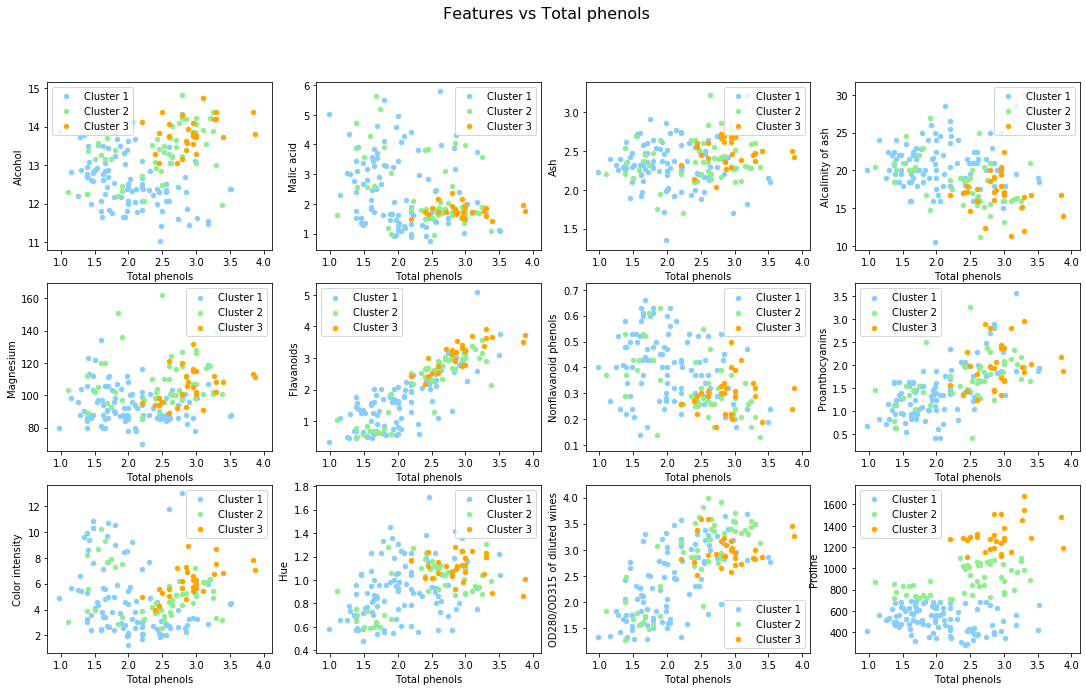

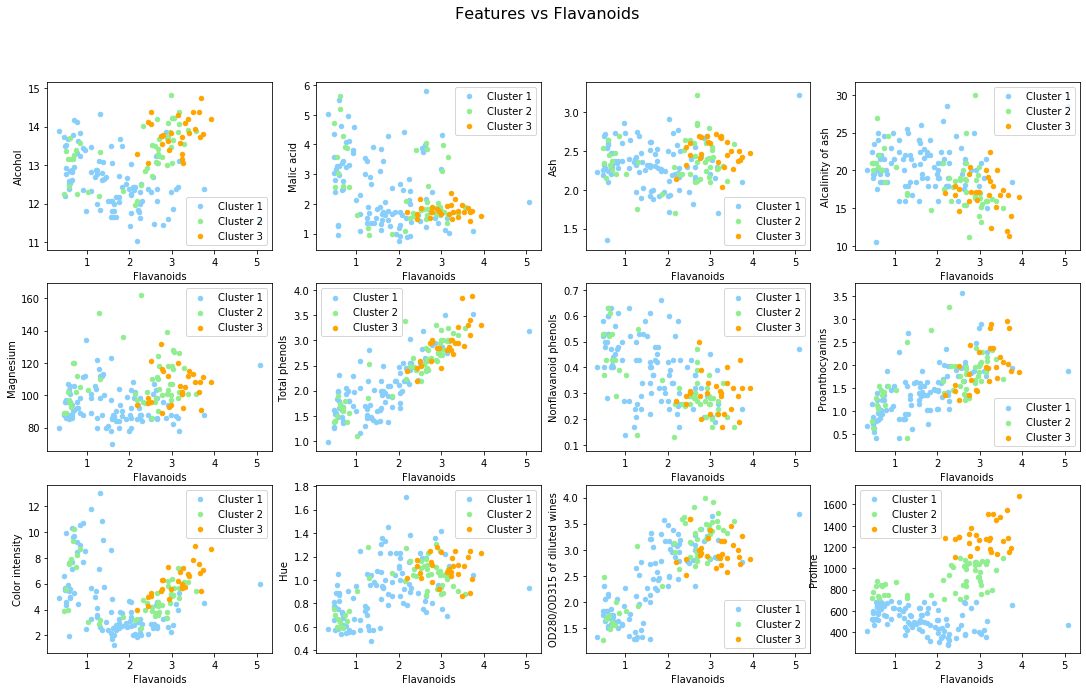

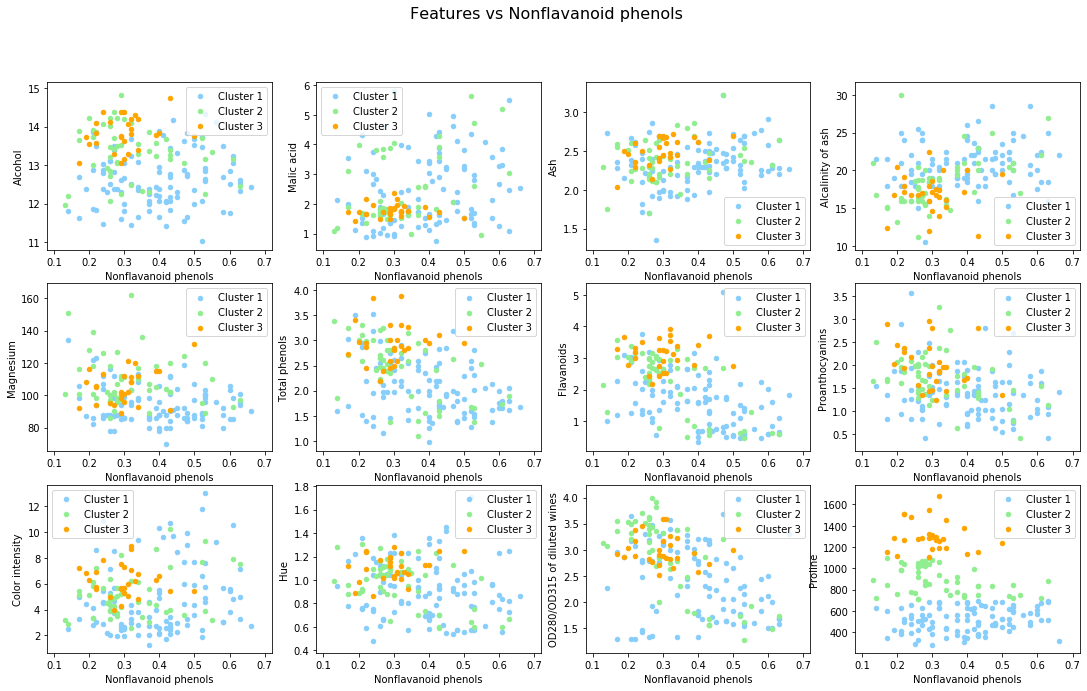

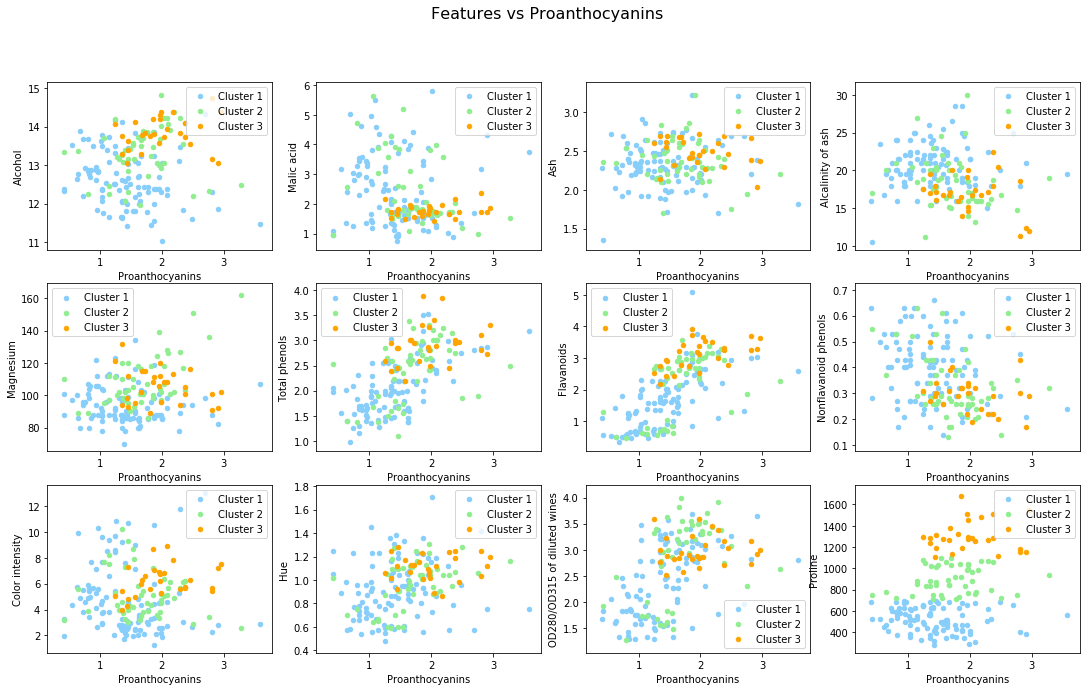

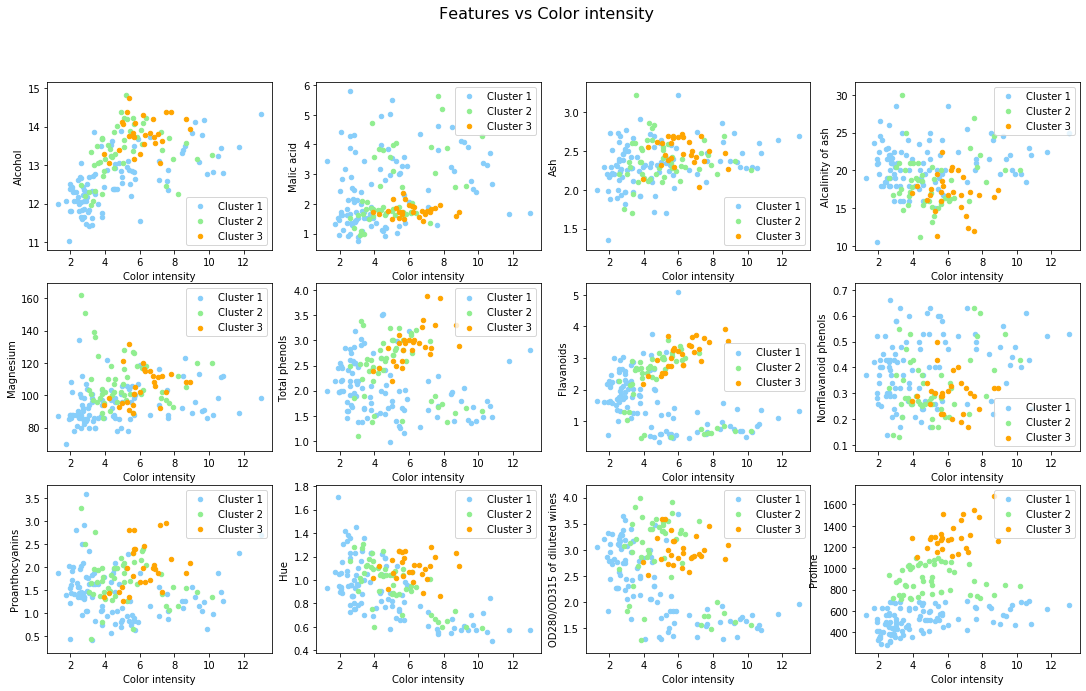

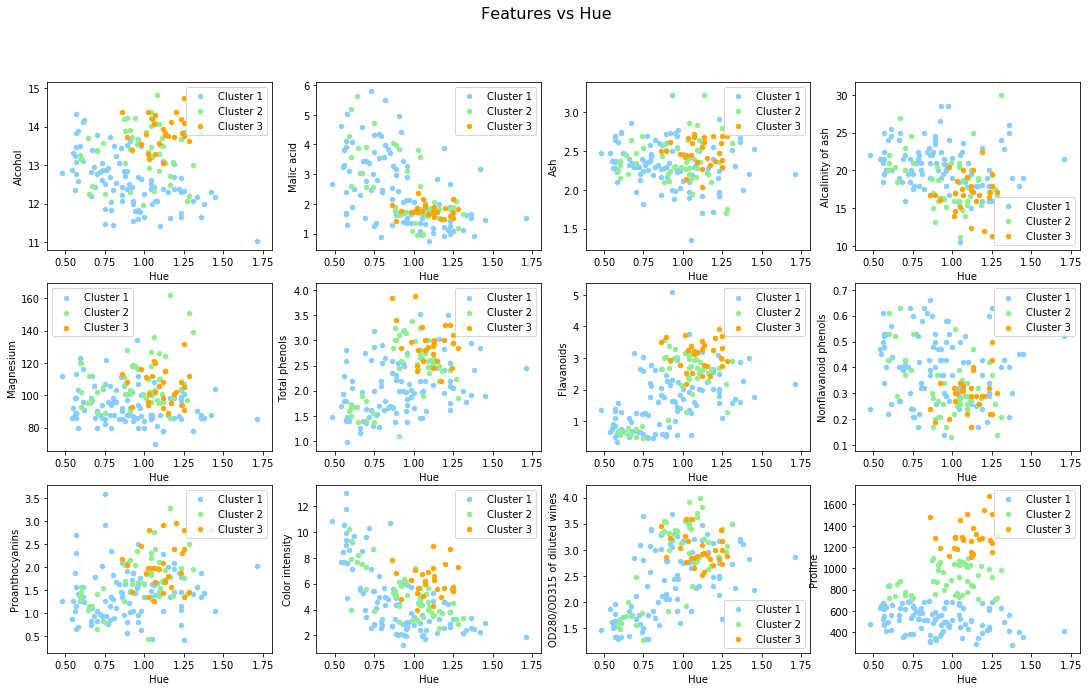

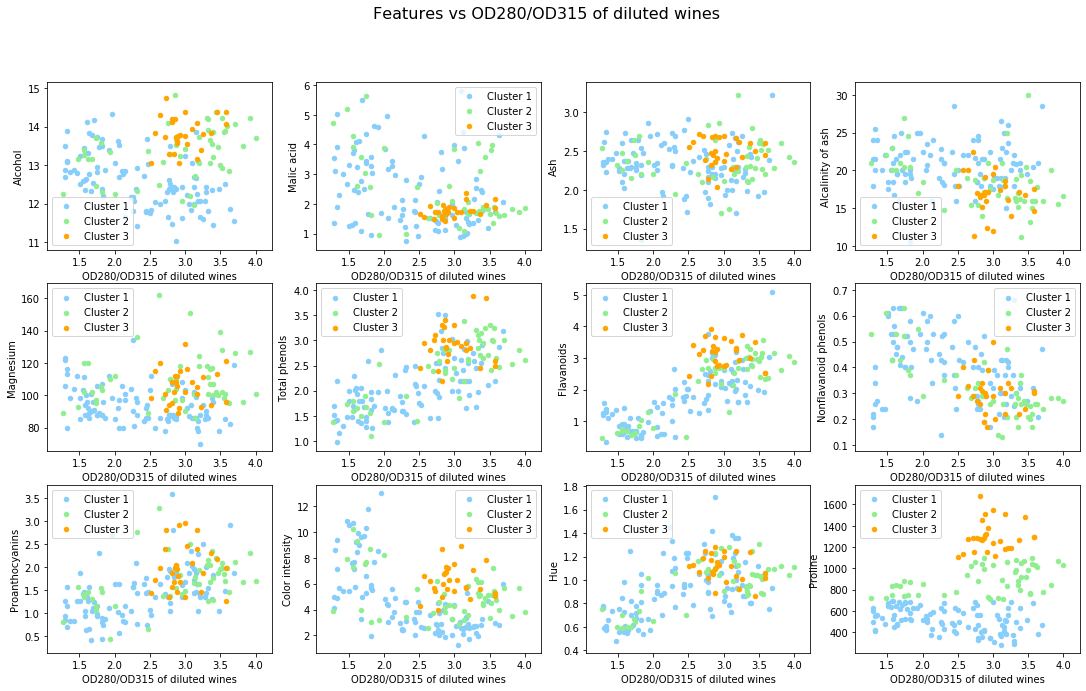

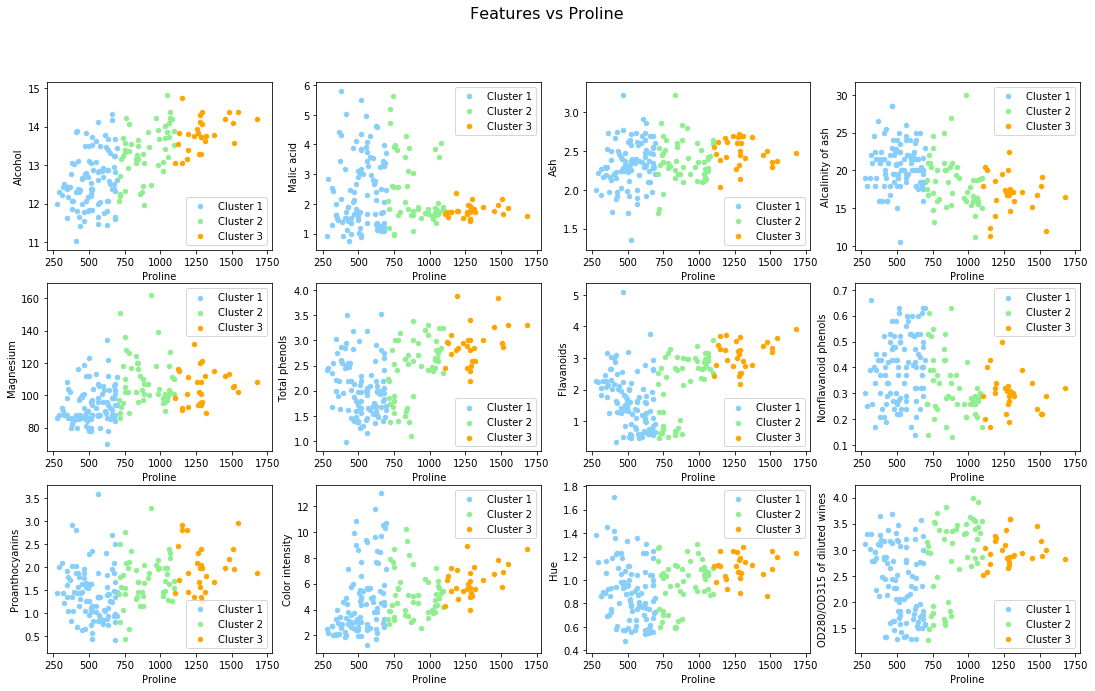

In [8]:
"""
Plot the distribution of the different features
"""

features = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 
            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity','Hue', 'OD280/OD315 of diluted wines', 'Proline']

for feature in features:
    fig, axes = plt.subplots(nrows=3, ncols=4)
    i = 0
    for vs_feature in features:
        if vs_feature == feature:
            pass
        else:
            cluster[cluster['Cluster']==1].plot(kind='scatter', x=feature, y=vs_feature, color='lightskyblue', label='Cluster 1', ax=axes[i//4,i%4])    
            cluster[cluster['Cluster']==2].plot(kind='scatter', x=feature, y=vs_feature, color='lightgreen', label='Cluster 2', ax=axes[i//4,i%4])    
            cluster[cluster['Cluster']==3].plot(kind='scatter', x=feature, y=vs_feature, color='orange', label='Cluster 3', ax=axes[i//4,i%4])
            i += 1
            
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.suptitle('Features vs '+ feature, fontsize=16)
    plt.show()

In this way we achieve a clusters division that we can consider "perfect" comparing the “Proline” with all of the features. So we can say that the “proline” is an important feature we need to divide in clusters using the algorithm k-means for the data frame “wine”. And also, repeating the algorithm the “proline” is always an important feature as we can observe.

### Standard k-means via MapReduce
Recall that each iteration of standard k-means can be divided into two phases, the first of which computes the sets $S_i$ of points closest to mean $\mu_i$, and the second of which computes new means as the centroids of these sets. These two phases correspond to the Map and Reduce phases of our MapReduce algorithm. The Map phase operates on each point $x$ in the dataset. For a given $x$, we compute the squared distance between x and each mean and find the mean $\mu_i$ which minimizes this distance. We then emit a key-value pair with this mean’s index i as key and the value $(x, 1)$. So our function is